---
author: Darren Biskup
date: September 17 2025
title: Homework 2 - Bayes Filter

jupyter: python3
embed-resources: true
---

**1. (20pts) In the robot-door example from class, we calculated the predicted belief assuming that, after initial state, the robot pushed the door. Now, repeat the prediction calculations assuming that the robot did nothing. Can you tell what the predicted belief will be without doing any calculations? Explain.**


In our prediction model, given the robot performs no action, the state of the system is predicted to remain unchanged.

$$
\begin{aligned}
P(x_{t+1} = \text{open} | x_t = \text{open}, u = \text{none}) &= 1 \\
P(x_{t+1} = \text{closed} | x_t = \text{open}, u = \text{none}) &= 0 \\
P(x_{t+1} = \text{open} | x_t = \text{closed}, u = \text{none}) &= 0 \\
P(x_{t+1} = \text{open} | x_t = \text{open}, u = \text{none}) &= 1
\end{aligned}
$$

Therefore, we can infer that the predicted belief will remain the same as the prior belief without performing any calculations.

$$
\begin{aligned}
\bar{bel}(x_{t+1} = \text{open}) = &P(x_{t+1} = \text{open} | x_t = \text{open}, u = \text{none})bel(x_t = \text{open}) + \\
&P(x_{t+1} = \text{open} | x_t = \text{closed}, u = \text{none})bel(x_t = \text{closed})
\end{aligned}
$$

$$
\begin{aligned}
\bar{bel}(x_{t+1} = \text{open}) = &1 * 0.5 + 0 * 0.5 \\
\bar{bel}(x_{t+1} = \text{open}) = & 0.5
\end{aligned}
$$

This is the same as our prior belief.

**2. (40pts) Assume that the robot has the following action policy:**

**a. If the belief that the door is open is less than 0.9, the robot pushes the door and then measures.**

**b. If the belief that the door is open is greater or equal to 0.9, the robot only measures, without pushing the door.**

**c. If the belief that the door is open is greater than 0.99 the robot proceeds through the door.**

**Calculate predicted and updated beliefs for each step assuming that each time the robot measures it senses that the door is open. Show all calculations for each step and present the results by completing the table below (the first row is the calculation we did in class). How many times does the robot push the door and how many measurements it needs to do before it can proceed through the door?**

| Step | bel(open) | bel(clsd) | Action | bel̅(open) | bel̅(clsd) | bel⁺(open) | bel⁺(clsd) |
|------|-----------|-----------|--------|------------|------------|------------|------------|
| 0    | 0.5       | 0.5     | push   | 0.8        | 0.2        | 0.878      | 0.122      |
| 1    | 0.878     | 0.122     |     -   |     -       |      -      |    -        |     -       |
| ...  |     -      |     -      |    -    |      -      |     -       |    -        |     -       |
|  -    | ?         | ?         | go!    |        -    |       -     |        -    |      -      |


Our current belief is that the door is open with a probability of 0.878, which is less than 0.9. Therefore, according to the robot's action policy, it will push the door again and then measure. After pushing the door, we calculate the predicted beliefs using the prediction model:

$$
\begin{aligned}
\bar{bel}(x_{t+1} = \text{open}) = &P(x_{t+1} = \text{open} | x_t = \text{open}, u = \text{push})bel(x_t = \text{open}) + \\
&P(x_{t+1} = \text{open} | x_t = \text{closed}, u = \text{push})bel(x_t = \text{closed}) \\
&= 0.878*1 + 0.122*0.6  = 0.9512 
\end{aligned}
$$

$$
\begin{aligned}
\bar{bel}(x_{t+1} = \text{closed}) = &P(x_{t+1} = \text{closed} | x_t = \text{open}, u = \text{push})bel(x_t = \text{open}) + \\
&P(x_{t+1} = \text{closed} | x_t = \text{closed}, u = \text{push})bel(x_t = \text{closed}) \\
&= 0.878*0 + 0.122*0.4 = 0.0488 = 1 - \bar{bel}(x_{t+1} = \text{open})
\end{aligned}
$$

Then we can use these predicted beliefs to calculate the updated beliefs after applying the measurement model

$$
\begin{aligned}
bel⁺(x_t =\text{open}) = P(x_t = \text{open} | z_t = \text{open}) &= \eta P(z_t = \text{open} | x_t = \text{open})\bar{bel}(x_t = \text{open}) \\
&= \eta 0.9 * 0.9512 = \eta 0.85608 \\
bel⁺(x_t =\text{closed}) = P(x_t = \text{closed} | z_t = \text{open}) &= \eta P(z_t = \text{open} | x_t = \text{closed})\bar{bel}(x_t = \text{closed}) \\
&= \eta 0.5 * 0.0488 = \eta 0.0244 \\
\eta &= \frac{1}{0.85608 + 0.0244} = 1.1357441395 \\
bel⁺(x_t =\text{open}) &= 1.1357441395 * 0.85608 = 0.9722878 \\
bel⁺(x_t =\text{closed}) &= 1.1357441395 * 0.0244 = 0.02771 \\
\end{aligned}
$$

Table after Step 1:

| Step | bel(open) | bel(clsd) | Action | bel̅(open) | bel̅(clsd) | bel⁺(open) | bel⁺(clsd) |
|------|-----------|-----------|--------|------------|------------|------------|------------|
| 0    | 0.5       | 0.5     | push   | 0.8        | 0.2        | 0.878      | 0.122      |
| 1    | 0.878     | 0.122     |     push   |     0.9512       |    0.0488      |     0.9722878     |    0.02771      |
| 2  |    0.9722878     |     0.02771      |    none    |      -      |     -       |    -        |     -       |
|  -    | ?         | ?         | go!    |        -    |       -     |        -    |      -      |

rest of calculations done by hand

![Step 2 Calculations](step2_calculations.jpg){ width=50% }

Table after Step 2:

| Step | bel(open) | bel(clsd) | Action | bel̅(open) | bel̅(clsd) | bel⁺(open) | bel⁺(clsd) |
|------|-----------|-----------|--------|------------|------------|------------|------------|
| 0    | 0.5       | 0.5     | push   | 0.8        | 0.2        | 0.878      | 0.122      |
| 1    | 0.878     | 0.122     |     push   |     0.9512       |    0.0488      |     0.9722878     |    0.02771      |
| 2  |    0.9722878     |     0.02771      |    none    |      0.9722878      |     0.02771       |    0.984414        |     .015586       |
| 3  |    0.984414     |     0.015586      |    none    |      -      |     -       |    -        |     -       |
|  -    | ?         | ?         | go!    |        -    |       -     |        -    |      -      |

![Step 3 Calculations](step3_calculations.jpg){ width=50% }

Table after Step 3:

| Step | bel(open) | bel(clsd) | Action | bel̅(open) | bel̅(clsd) | bel⁺(open) | bel⁺(clsd) |
|------|-----------|-----------|--------|------------|------------|------------|------------|
| 0    | 0.5       | 0.5     | push   | 0.8        | 0.2        | 0.878      | 0.122      |
| 1    | 0.878     | 0.122     |     push   |     0.9512       |    0.0488      |     0.9722878     |    0.02771      |
| 2  |    0.9722878     |     0.02771      |    none    |      0.9722878      |     0.02771       |    0.984414        |     .015586       |
| 3  |    0.984414     |     0.015586      |    none    |      0.984414      |     0.015586       |    0.99128        |     0.0087195       |
| 4  |    0.99128     |     0.0087195      |    go!    |      -      |     -       |    -        |     -       |


Therefore, the robot pushes the door 2 times and takes 4 measurements before it can proceed through the door.

**3. (40pts) Extend the program from class to calculate belief progression assuming that the robot is repetitively pushing the door and reading the same measurement sequence that we used in class: open, open, open, open, open, closed, open, open.**

First using the example code from class to obtain the belief progression when the robot is only measuring the door

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# index 0 means open
# index 1 means closed

# rows are measurements, columns are priors
measurement_model = np.array(
    [ [ 0.9, 0.5 ],
      [ 0.1, 0.5 ] ]
)
bel = np.array(
    [ [ 0.5 ],
      [ 0.5 ] ]
)
measurements = [ 0, 0, 0, 0, 0, 1, 0, 0 ]
beliefs_measurement_only = []
for measurement in measurements:
    unnormalized_posterior = (
        measurement_model * \
        np.repeat(bel, 2, axis=1).transpose())[measurement]
    posterior = unnormalized_posterior / sum(unnormalized_posterior)
    beliefs_measurement_only.append(round(posterior[0], 3))
    bel = np.array([ posterior ]).transpose()

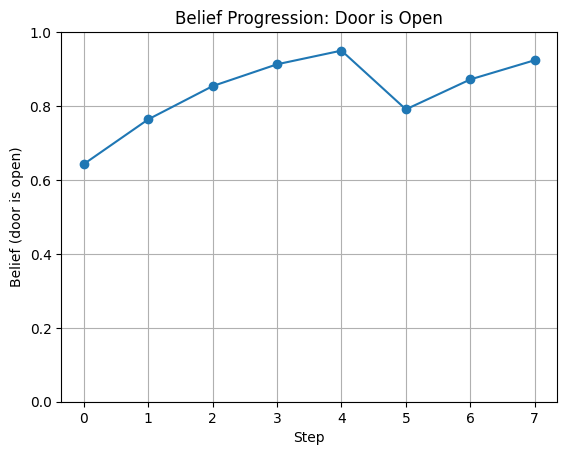

In [17]:
plt.plot(range(len(beliefs_measurement_only)), beliefs_measurement_only, marker='o')
plt.xlabel('Step')
plt.ylabel('Belief (door is open)')
plt.title('Belief Progression: Door is Open')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Now we will calculate the belief progression when the robot is pushing the door before each measurement


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# index 0 means open
# index 1 means closed

# rows are measurements, columns are priors
measurement_model = np.array(
    [ [ 0.9, 0.5 ],
      [ 0.1, 0.5 ] ]
)

prediction_model_push = np.array(
    [ [ 1.0 , 0.6 ],
      [ 0.0 , 0.4 ] ]
)

bel = np.array(
    [ [ 0.5 ],
      [ 0.5 ] ]
)
measurements = [ 0, 0, 0, 0, 0, 1, 0, 0 ]
beliefs_with_push = []
for measurement in measurements:
    # first apply the prediction model
    bel_bar = prediction_model_push @ bel
    
    unnormalized_posterior = (
        measurement_model * \
        np.repeat(bel_bar, 2, axis=1).transpose())[measurement]
    posterior = unnormalized_posterior / sum(unnormalized_posterior)
    beliefs_with_push.append(round(posterior[0], 3))
    bel = np.array([ posterior ]).transpose()

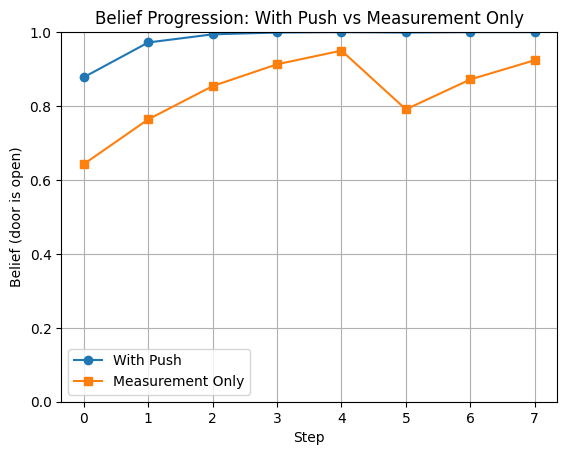

In [19]:
plt.plot(range(len(beliefs_with_push)), beliefs_with_push, marker='o', label='With Push')
plt.plot(range(len(beliefs_measurement_only)), beliefs_measurement_only, marker='s', label='Measurement Only')
plt.xlabel('Step')
plt.ylabel('Belief (door is open)')
plt.title('Belief Progression: With Push vs Measurement Only')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()

In [20]:
print("Beliefs with measurement only:", beliefs_measurement_only)
print("Beliefs with push:", beliefs_with_push)

Beliefs with measurement only: [0.643, 0.764, 0.854, 0.913, 0.95, 0.791, 0.872, 0.924]
Beliefs with push: [0.878, 0.972, 0.994, 0.999, 1.0, 0.999, 1.0, 1.0]
